In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [39]:
data = pd.read_excel('/Deaths.xlsx')

In [53]:

print(data.shape)

print(data['Year'].head())


(75, 4)
0    1950
1    1951
2    1952
3    1953
4    1954
Name: Year, dtype: int64


In [40]:
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Total Deaths'] = pd.to_numeric(data['Total Deaths'].str.replace(',', ''), errors='coerce')
data['Female Deaths'] = pd.to_numeric(data['Female Deaths'].str.replace(',', ''), errors='coerce')
data['Male Deaths'] = pd.to_numeric(data['Male Deaths'].str.replace(',', ''), errors='coerce')


In [41]:
data = data.dropna()

In [42]:
X = data[['Year']]

In [54]:
from sklearn.preprocessing import PolynomialFeatures


# Generate polynomial features
poly = PolynomialFeatures(degree=2)

# Train model for total deaths
X_total = poly.fit_transform(data[['Year']])
y_total = data['Total Deaths']
model_total = LinearRegression()
model_total.fit(X_total, y_total)

# Train model for female deaths
y_female = data['Female Deaths']
model_female = LinearRegression()
model_female.fit(X_total, y_female)

# Train model for male deaths
y_male = data['Male Deaths']
model_male = LinearRegression()
model_male.fit(X_total, y_male)


LinearRegression()

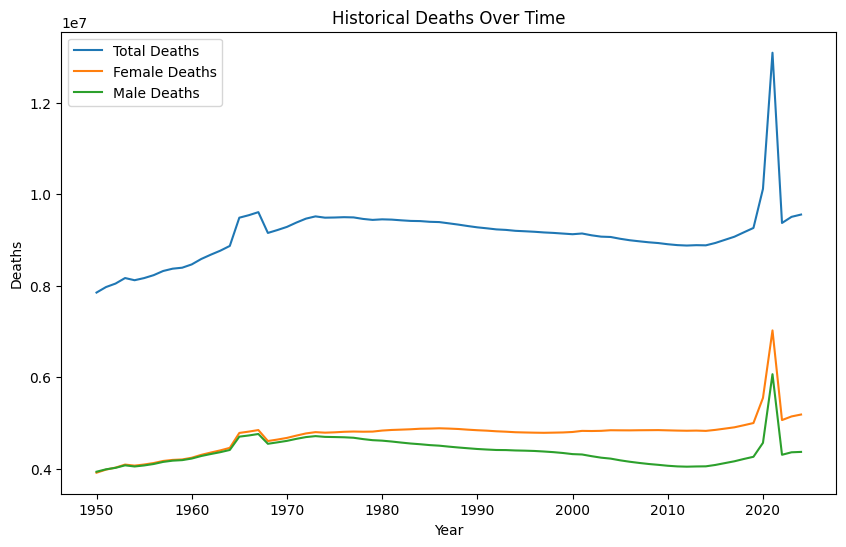

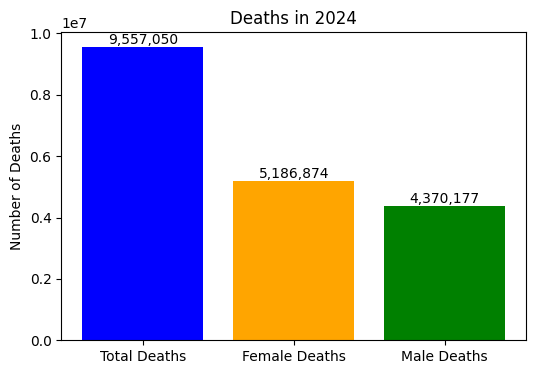

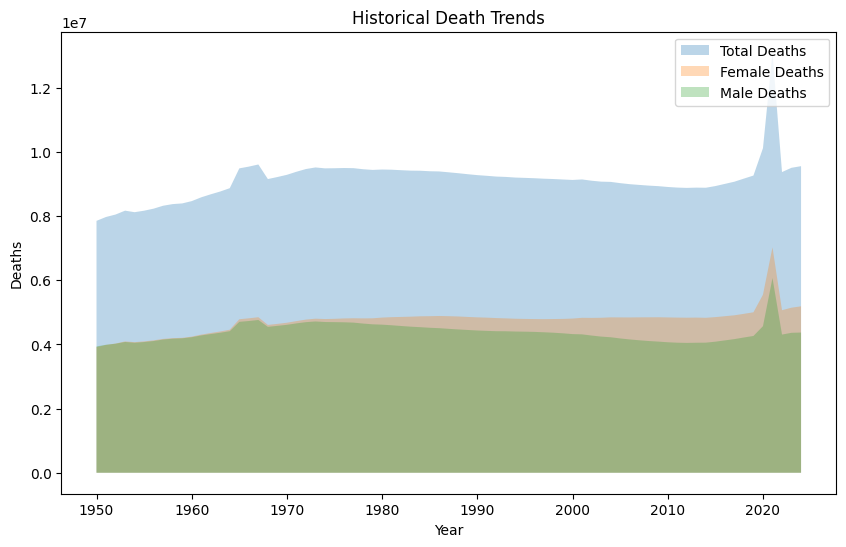

In [50]:
# Function to plot the existing data (historical data)
def plot_historical_data(data):

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    for category in ['Total Deaths', 'Female Deaths', 'Male Deaths']:
        ax.plot(data['Year'], data[category], label=category)

    ax.set_xlabel('Year')
    ax.set_ylabel('Deaths')
    ax.set_title('Historical Deaths Over Time')
    ax.legend()
    plt.show()

    latest_year_data = data.iloc[-1:]
    bar_data = pd.DataFrame({
        'Category': ['Total Deaths', 'Female Deaths', 'Male Deaths'],
        'Deaths': [latest_year_data['Total Deaths'].values[0],
                   latest_year_data['Female Deaths'].values[0],
                   latest_year_data['Male Deaths'].values[0]]
    })

    fig_bar, ax_bar = plt.subplots(figsize=(6, 4))
    ax_bar.bar(bar_data['Category'], bar_data['Deaths'], color=['blue', 'orange', 'green'])
    ax_bar.set_title(f"Deaths in {latest_year_data['Year'].values[0]}")
    ax_bar.set_ylabel('Number of Deaths')
    for i, v in enumerate(bar_data['Deaths']):
        ax_bar.text(i, v + 5000, f'{int(v):,}', ha='center', va='bottom')
    plt.show()

    fig_area, ax_area = plt.subplots(figsize=(10, 6))
    for category in ['Total Deaths', 'Female Deaths', 'Male Deaths']:
        ax_area.fill_between(data['Year'], data[category], alpha=0.3, label=category)

    ax_area.set_xlabel('Year')
    ax_area.set_ylabel('Deaths')
    ax_area.set_title('Historical Death Trends')
    ax_area.legend()
    plt.show()

plot_historical_data(data)


Enter the start year: 2025
Enter the end year: 2030


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


Predictions for the Years 2025 to 2030:
Year 2025:
  Total Deaths: 9,251,643
  Female Deaths: 5,102,088
  Male Deaths: 4,149,554
------------------------------
Year 2026:
  Total Deaths: 9,714,225
  Female Deaths: 5,357,193
  Male Deaths: 4,357,032
------------------------------
Year 2027:
  Total Deaths: 10,199,937
  Female Deaths: 5,625,053
  Male Deaths: 4,574,883
------------------------------
Year 2028:
  Total Deaths: 10,709,933
  Female Deaths: 5,906,305
  Male Deaths: 4,803,628
------------------------------
Year 2029:
  Total Deaths: 11,245,430
  Female Deaths: 6,201,621
  Male Deaths: 5,043,809
------------------------------
Year 2030:
  Total Deaths: 11,807,702
  Female Deaths: 6,511,702
  Male Deaths: 5,296,000
------------------------------


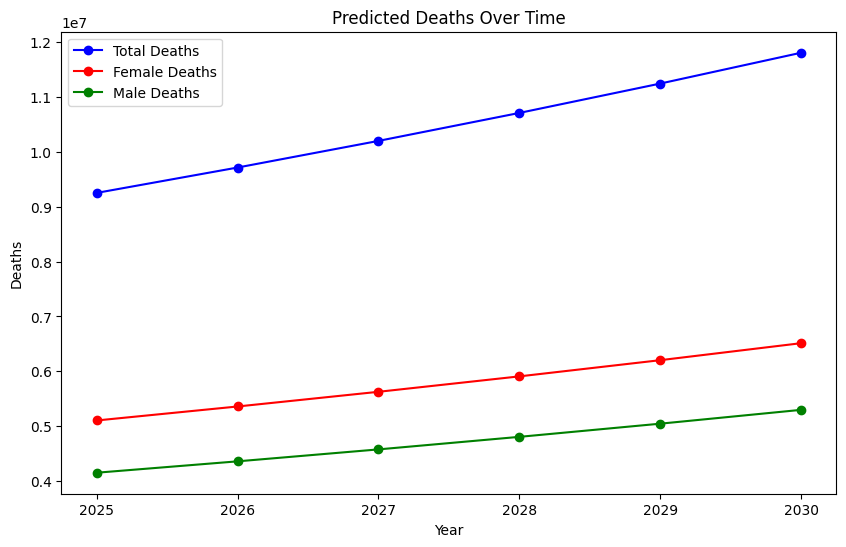

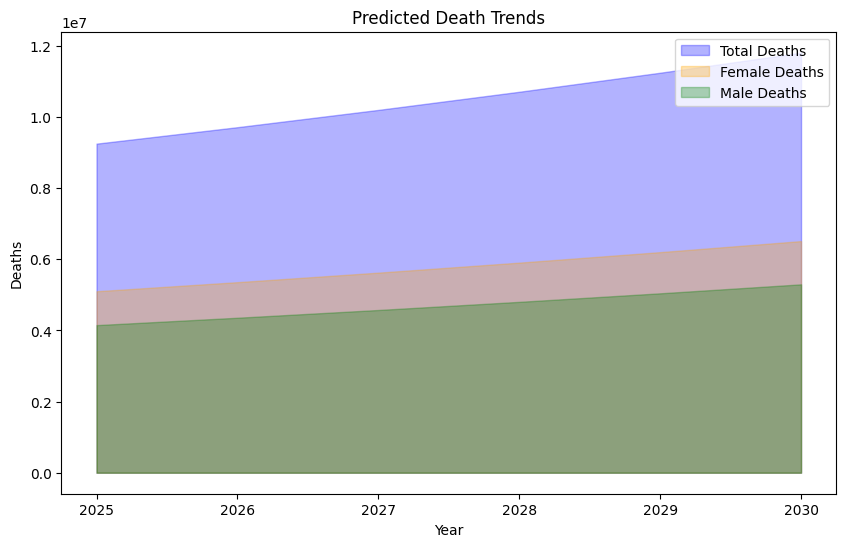

In [58]:
def predict_future_deaths(start_year, end_year):
    try:
        years = np.array(range(start_year, end_year + 1)).reshape(-1, 1)
        years_poly = poly.transform(years)

        predicted_total = model_total.predict(years_poly)
        predicted_female = model_female.predict(years_poly)
        predicted_male = model_male.predict(years_poly)

        for i in range(1, len(predicted_total)):
            predicted_total[i] = max(predicted_total[i], predicted_total[i - 1] * 1.05)
            predicted_female[i] = max(predicted_female[i], predicted_female[i - 1] * 1.05)
            predicted_male[i] = max(predicted_male[i], predicted_male[i - 1] * 1.05)

        print(f"Predictions for the Years {start_year} to {end_year}:")
        for i, year in enumerate(range(start_year, end_year + 1)):
            print(f"Year {year}:")
            print(f"  Total Deaths: {int(predicted_total[i]):,}")
            print(f"  Female Deaths: {int(predicted_female[i]):,}")
            print(f"  Male Deaths: {int(predicted_male[i]):,}")
            print('-' * 30)

        plot_predicted_graphs(range(start_year, end_year + 1), predicted_total, predicted_female, predicted_male)

    except ValueError:
        print("Invalid Input: Please enter valid years.")

def plot_predicted_graphs(years, predicted_total, predicted_female, predicted_male):

    fig_line, ax_line = plt.subplots(figsize=(10, 6))
    ax_line.plot(years, predicted_total, 'bo-', label='Total Deaths')
    ax_line.plot(years, predicted_female, 'ro-', label='Female Deaths')
    ax_line.plot(years, predicted_male, 'go-', label='Male Deaths')

    ax_line.set_xlabel('Year')
    ax_line.set_ylabel('Deaths')
    ax_line.set_title('Predicted Deaths Over Time')
    ax_line.legend()
    plt.show()


    fig_area, ax_area = plt.subplots(figsize=(10, 6))
    ax_area.fill_between(years, 0, predicted_total, color='blue', alpha=0.3, label='Total Deaths')
    ax_area.fill_between(years, 0, predicted_female, color='orange', alpha=0.3, label='Female Deaths')
    ax_area.fill_between(years, 0, predicted_male, color='green', alpha=0.3, label='Male Deaths')

    ax_area.set_xlabel('Year')
    ax_area.set_ylabel('Deaths')
    ax_area.set_title('Predicted Death Trends')
    ax_area.legend()
    plt.show()


start_year = int(input("Enter the start year: "))
end_year = int(input("Enter the end year: "))

predict_future_deaths(start_year, end_year)